# Jesse Gutierrez Jr
## Data4319 Create First Jupyter Notebook
### 03 Feb 2019

In [31]:
using Plots

### Create a function with inheriant variables that accepts an input n and epsilon

In [32]:
function make_random_linearSeparable_data(n, ϵ)
    w = rand(2)                             # creates random two element array
    w[2] = w[2]/5                           # takes the second element and divides by 5 and assigns it to w[2]
    Data = rand(n,2)                        # creates 2 element arrays with n rows
    Data = [(Data[i,1], Data[i,2]) for i = 1:n     
            if abs(Data[i,2] - w[1]*Data[i,1] - w[2]) > ϵ]
    Y = [Data[i][2] > w[1]*Data[i][1] + w[2] ? 1 : -1 for i = 1:size(Data)[1]]        
    
            
    return Data, Y, w
end

make_random_linearSeparable_data (generic function with 1 method)

In [33]:
D, Y, coeff = make_random_linearSeparable_data(50, 0.02)

(Tuple{Float64,Float64}[(0.370104, 0.955155), (0.759171, 0.886372), (0.716716, 0.638473), (0.494804, 0.590365), (0.244835, 0.214258), (0.514967, 0.878357), (0.0244654, 0.209861), (0.780976, 0.990773), (0.439142, 0.172248), (0.385239, 0.481154)  …  (0.423808, 0.976552), (0.183547, 0.260805), (0.671112, 0.205436), (0.31022, 0.457748), (0.165907, 0.48896), (0.559939, 0.502022), (0.428077, 0.966707), (0.234353, 0.424046), (0.207695, 0.150475), (0.507862, 0.873103)], [1, 1, -1, 1, -1, 1, 1, 1, -1, 1  …  1, 1, -1, 1, 1, -1, 1, 1, -1, 1], [0.955212, 0.0229663])

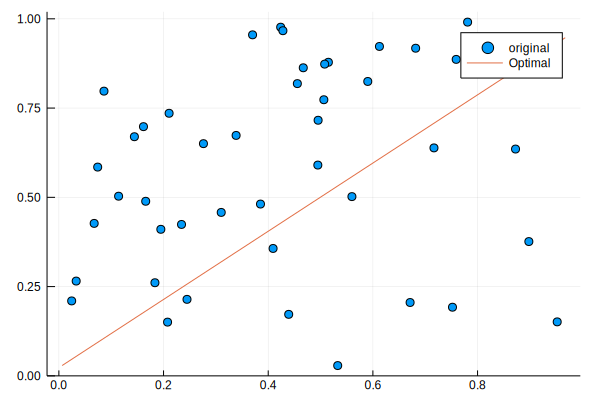

In [39]:
scatter(D, label = "original")
plot!(x -> coeff[1]*x + coeff[2], label = "Optimal")

In [40]:
function perceptron(data, labels, w)
        
    # Define hypothesis function 
    h(x) = w'*[1.0, x[1], x[2]] < 0 ? -1 : 1
    
    for i = 1:size(data)[1]
        if h(data[i]) != labels[i]
            w += labels[i]*[1.0, data[i][1], data[i][2]]
        end
    end
    return w
end

perceptron (generic function with 1 method)

In [41]:
w = perceptron(D, Y, rand(3));

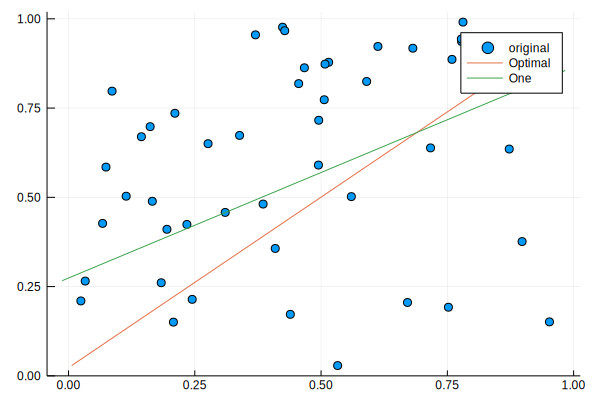

In [42]:
plot!(x -> (-w[1]-w[2]*x)/w[3], label = "One")

In [43]:
w = perceptron(D, Y, w);

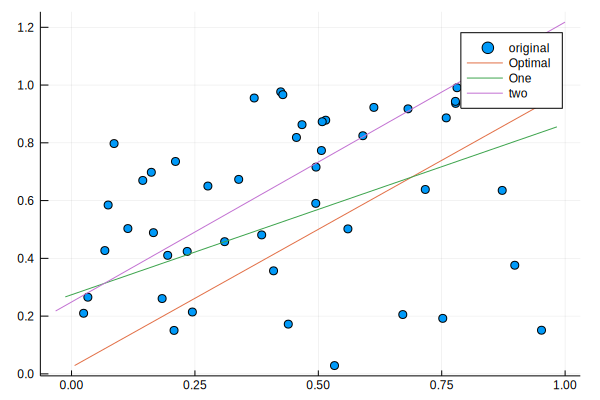

In [44]:
plot!(x -> (-w[1]-w[2]*x)/w[3],label="two")

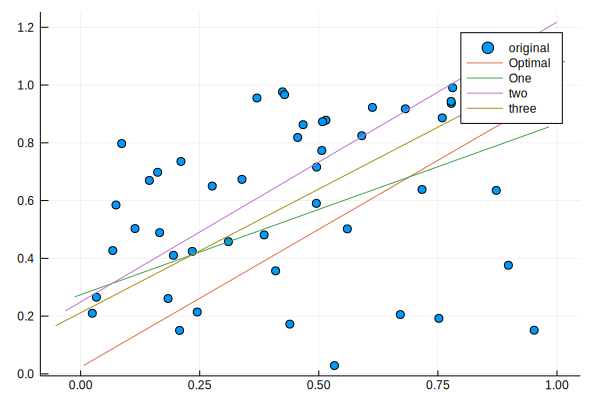

In [45]:
w = perceptron(D, Y, w)
plot!(x -> (-w[1]-w[2]*x)/w[3], label="three")

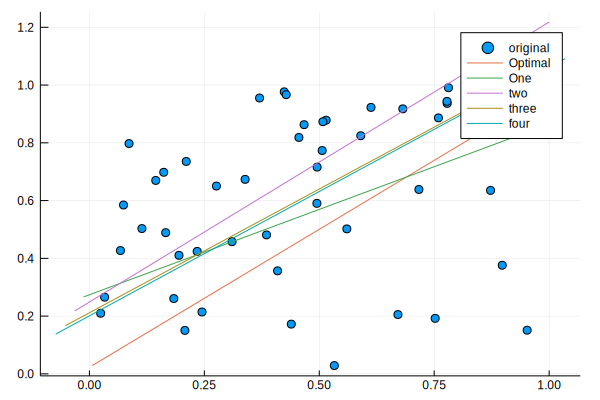

In [46]:
w = perceptron(D, Y, w)
plot!(x -> (-w[1]-w[2]*x)/w[3], label="four")

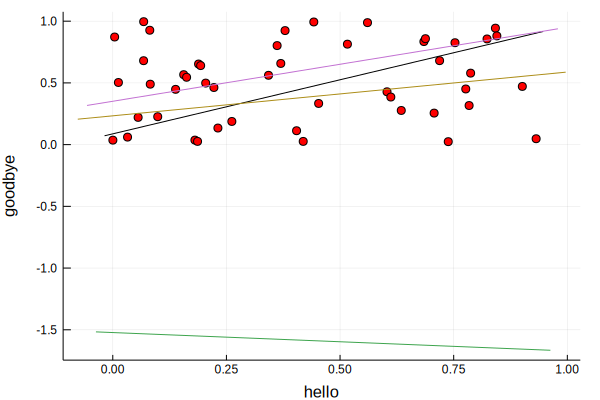

In [30]:
plot!(x -> (-w[1]-w[2]*x)/w[3])

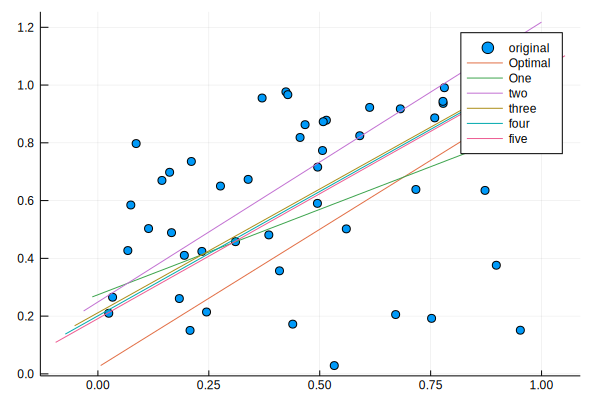

In [47]:
w = perceptron(D, Y, w)
plot!(x -> (-w[1]-w[2]*x)/w[3], label="five")

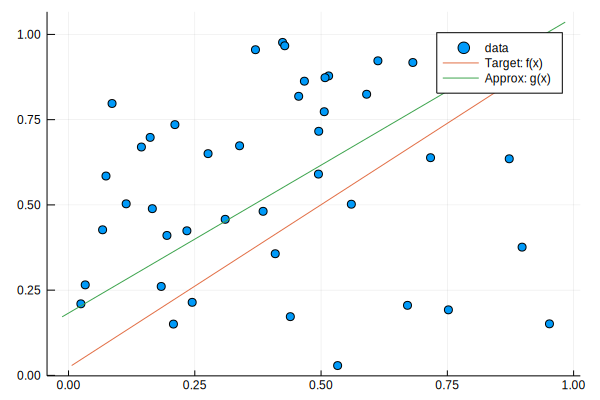

In [48]:
w = perceptron(D, Y, w)
scatter(D, label = "data")
plot!(x -> coeff[1]*x + coeff[2], label = "Target: f(x)")
plot!(x -> (-w[1]-w[2]*x)/w[3], label="Approx: g(x)")